In [1]:
import os
import sys
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
warnings.filterwarnings("ignore")
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='orange', lw=4)]
# Initialization of directory information:
thisDir = os.path.expanduser('~/Desktop/MSC_Alexis/analysis/')
dataDir = thisDir + 'data/mvpa_data/'
outDir = thisDir + 'output/mL/results/ridge/permutation/'
CV=pd.read_csv(outDir+'CV/acc.csv')
SS=pd.read_csv(outDir+'SS/acc.csv')
BS=pd.read_csv(outDir+'BS/acc.csv')
DS=pd.read_csv(outDir+'DS/acc.csv')
subList=['MSC01','MSC02','MSC03','MSC04','MSC05','MSC06','MSC07','MSC10']
taskList=['motor','mem','mixed']
#comparison of generating null results
perm_same_task=pd.read_csv(thisDir+'output/mL/results/ridge/permutation/same_task.csv')
perm_diff_task=pd.read_csv(thisDir+'output/mL/results/ridge/permutation/diff_task.csv')


same_task=pd.read_csv(thisDir+'output/mL/results/ridge/permutation/real_same_task.csv')
diff_task=pd.read_csv(thisDir+'output/mL/results/ridge/permutation/real_diff_task.csv')


permCV=pd.read_csv(thisDir+'output/mL/results/ridge/permutation/CV/reformat_acc.csv')
permSS=pd.read_csv(thisDir+'output/mL/results/ridge/permutation/SS/reformat_acc.csv')
permDS=pd.read_csv(thisDir+'output/mL/results/ridge/permutation/DS/reformat_acc.csv')
permBS=pd.read_csv(thisDir+'output/mL/results/ridge/permutation/BS/reformat_acc.csv')




CV=pd.read_csv(thisDir+'output/mL/results/ridge/permutation/CV/real_reformat_acc.csv')
SS=pd.read_csv(thisDir+'output/mL/results/ridge/permutation/SS/real_reformat_acc.csv')
DS=pd.read_csv(thisDir+'output/mL/results/ridge/permutation/DS/real_reformat_acc.csv')
BS=pd.read_csv(thisDir+'output/mL/results/ridge/permutation/BS/real_reformat_acc.csv')

In [ ]:
#General results
fig=plt.figure(figsize=(10,6), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 1 rows by 3 columns
gs = gridspec.GridSpec(nrows=1, ncols=2)
#Different Tasks
ax1=fig.add_subplot(gs[0,0])
ax=sns.distplot(perm_diff_task['acc_diff'],color='blue', ax=ax1)
g=sns.distplot(diff_task['acc_diff'], color='orange',ax=ax1)
ax.set(xlabel='Within-Between')
ax.set_title('Different Task')
ax.set(ylabel='Frequency')
ax.legend(custom_lines, ['Null','Real'],loc='upper right',fontsize='medium',bbox_to_anchor=(.97, .9))


ax2=fig.add_subplot(gs[0,1],sharey=ax1)
plt.setp(ax2.get_yticklabels(), visible=False)
ax=sns.distplot(perm_same_task['acc_diff'],color='blue', ax=ax2)
g=sns.distplot(same_task['acc_diff'], color='orange',ax=ax2)
ax.set(xlabel='Within-Between')
ax.set_title('Same Task')
ax.set(ylabel=' ')
ax.legend(custom_lines, ['Permuted','Observed'],loc='upper right',fontsize='medium',bbox_to_anchor=(.97, .9))


In [ ]:
#same task 
fig=plt.figure(figsize=(10,6), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 1 rows by 3 columns
gs = gridspec.GridSpec(nrows=1, ncols=3)
#Mixed
ax1=fig.add_subplot(gs[0,0])
ax=sns.distplot(perm_same_task[(perm_same_task['task']=='mixed')].acc_diff.values,color='blue', ax=ax1)
g=sns.distplot(same_task[(same_task['task']=='mixed')].acc_diff.values, color='orange',ax=ax1)
ax.set(xlabel='Within-Between')
ax.set_title('Mixed',fontsize=20, pad=10)
ax.set(ylabel='Frequency')


#Memory
ax2=fig.add_subplot(gs[0,1],sharey=ax1)
plt.setp(ax2.get_yticklabels(), visible=False)
ax=sns.distplot(perm_same_task[(perm_same_task['task']=='mem')].acc_diff.values,color='blue', ax=ax2)
g=sns.distplot(same_task[(same_task['task']=='mem')].acc_diff.values, color='orange',ax=ax2)
ax.set(xlabel='Within-Between')
ax.set_title('Memory',fontsize=20, pad=10)
ax.set(ylabel=' ')


ax3=fig.add_subplot(gs[0,2],sharey=ax1)
plt.setp(ax3.get_yticklabels(), visible=False)
ax=sns.distplot(perm_same_task[(perm_same_task['task']=='motor')].acc_diff.values,color='blue', ax=ax3)
g=sns.distplot(same_task[(same_task['task']=='motor')].acc_diff.values, color='orange',ax=ax3)
ax.set(xlabel='Within-Between')
ax.set_title('Motor',fontsize=20, pad=10)
ax.set(ylabel=' ')
ax.legend(custom_lines, ['Permuted','Observed'],loc='upper right',fontsize='large',bbox_to_anchor=(1.7, 1.0))
plt.savefig(thisDir+'output/mL/images/ridge/figs/sameTask_perm_plots.png', bbox_inches='tight')

In [ ]:
#Diff task 
fig=plt.figure(figsize=(10,6), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 1 rows by 3 columns
gs = gridspec.GridSpec(nrows=3, ncols=3)
fig.suptitle('Testing', fontsize=20, fontweight='bold')
fig.text(-0.04, 0.5, 'Training', va='center', fontweight='bold',fontsize=20,rotation='vertical')
#Test Mixed blank

ax0=fig.add_subplot(gs[0,0])
plt.setp(ax0.get_yticklabels(), visible=False)
plt.setp(ax0.get_xticklabels(), visible=False)
ax0.set_title('Mixed', fontsize=20, pad=10)
ax0.set_ylabel('Mixed', rotation=0, fontsize=20, labelpad=40)

#Mixed test memory
ax1=fig.add_subplot(gs[0,1])
ax=sns.distplot(perm_diff_task[(perm_diff_task.train_task=='mixed')&(perm_diff_task.test_task=='mem')].acc_diff.values,color='blue', ax=ax1)
g=sns.distplot(diff_task[(diff_task.train_task=='mixed')&(diff_task.test_task=='mem')].acc_diff.values, color='orange',ax=ax1)
ax.set_title('Memory',fontsize=20, pad=10)

#Mixed test Motor
ax2=fig.add_subplot(gs[0,2],sharey=ax1)
ax=sns.distplot(perm_diff_task[(perm_diff_task.train_task=='mixed')&(perm_diff_task.test_task=='motor')].acc_diff.values,color='blue', ax=ax2)
g=sns.distplot(diff_task[(diff_task.train_task=='mixed')&(diff_task.test_task=='motor')].acc_diff.values, color='orange',ax=ax2)
ax.set_title('Motor', fontsize=20, pad=10)
ax.set(ylabel=' ')
ax.legend(custom_lines, ['Permuted','Observed'],loc='upper right',fontsize='large',bbox_to_anchor=(1.7, 1.0))

#Memory test mixed
ax3=fig.add_subplot(gs[1,0])
ax=sns.distplot(perm_diff_task[(perm_diff_task.train_task=='mem')&(perm_diff_task.test_task=='mixed')].acc_diff.values,color='blue', ax=ax3)
g=sns.distplot(diff_task[(diff_task.train_task=='mem')&(diff_task.test_task=='mixed')].acc_diff.values, color='orange',ax=ax3)
ax.set_ylabel('Memory', rotation=0, fontsize=20, labelpad=40)

#Memory test memory
ax4=fig.add_subplot(gs[1,1])
plt.setp(ax4.get_yticklabels(), visible=False)
plt.setp(ax4.get_xticklabels(), visible=False)

#Memory test motor
ax5=fig.add_subplot(gs[1,2],sharex=ax2, sharey=ax3)
ax=sns.distplot(perm_diff_task[(perm_diff_task.train_task=='mem')&(perm_diff_task.test_task=='motor')].acc_diff.values,color='blue', ax=ax5)
g=sns.distplot(diff_task[(diff_task.train_task=='mem')&(diff_task.test_task=='motor')].acc_diff.values, color='orange',ax=ax5)


#Motor test mixed
ax6=fig.add_subplot(gs[2,0],sharex=ax3)
ax=sns.distplot(perm_diff_task[(perm_diff_task.train_task=='motor')&(perm_diff_task.test_task=='mixed')].acc_diff.values,color='blue', ax=ax6)
g=sns.distplot(diff_task[(diff_task.train_task=='motor')&(diff_task.test_task=='mixed')].acc_diff.values, color='orange',ax=ax6)
ax.set_ylabel('Motor', rotation=0, fontsize=20, labelpad=30)

#motor test mem
ax7=fig.add_subplot(gs[2,1],sharey=ax6, sharex=ax1)
ax=sns.distplot(perm_diff_task[(perm_diff_task.train_task=='motor')&(perm_diff_task.test_task=='mem')].acc_diff.values,color='blue', ax=ax7)
g=sns.distplot(diff_task[(diff_task.train_task=='motor')&(diff_task.test_task=='mem')].acc_diff.values, color='orange',ax=ax7)


#Motor test motor
ax8=fig.add_subplot(gs[2,2])
plt.setp(ax8.get_yticklabels(), visible=False)
plt.setp(ax8.get_xticklabels(), visible=False)



plt.savefig(thisDir+'output/mL/images/ridge/figs/diffTask_perm_plots.png', bbox_inches='tight')



In [ ]:
#dataframe of pvals for each task in same task 
tasks=[]
p_val=[]
for task in taskList:
    tmpST=same_task.loc[same_task['task']==task]
    muST=tmpST.acc_diff.mean()
    ST_perm=perm_same_task.loc[perm_same_task['task']==task]
    ST_perm_keep=ST_perm[ST_perm['acc_diff']>muST]
    count=ST_perm_keep.count()
    p=(count.acc_diff+1)/8001
    tasks.append(task)
    p_val.append(p)
ST_all=pd.DataFrame({'task':tasks, 'pval':p_val})
    

ST_all.set_index('task',inplace=True)

In [ ]:
ax=sns.heatmap(ST_all, annot=True, vmin=0, vmax=.05, cmap="coolwarm")
ax.set_title('Same Task (W-B)', fontsize=20, pad=10)
ax.tick_params(labelsize=10)
plt.ylabel('Task',fontsize=20)
plt.savefig(thisDir+'output/mL/images/ridge/figs/ST_pvals_plots_all.png', bbox_inches='tight')

In [ ]:
#dataframe to hold p values for each task by task
training=[]
testing=[]
p_values=[]
for train_task in taskList:
    for test_task in taskList:
        if train_task==test_task:
            continue
        else:
            DT=diff_task.loc[(diff_task['train_task']==train_task) & (diff_task['test_task']==test_task)]
            DTmu=DT.acc_diff.mean()
            DT_perm=perm_diff_task.loc[(perm_diff_task['train_task']==train_task) & (perm_diff_task['test_task']==test_task)]

            DT_perm_kept=DT_perm[DT_perm['acc_diff']>DTmu]
            count=DT_perm_kept.count()
            pval=(count.acc_diff+1)/(8001)
            training.append(train_task)
            testing.append(test_task)
            p_values.append(pval)
DT_all=pd.DataFrame({'train_task':training,'test_task':testing,'pval':p_values})

DT_all=DT_all.pivot('train_task','test_task','pval')

In [ ]:
ax=sns.heatmap(DT_all, annot=True, vmin=0, vmax=.05, cmap="coolwarm")
ax.set_title('Diff Task (W-B)', fontsize=20, pad=10)
ax.tick_params(labelsize=10)
plt.ylabel('Train Task',fontsize=20)
plt.xlabel('Test Task',fontsize=20)
plt.savefig(thisDir+'output/mL/images/ridge/figs/DT_pvals_plots_all.png', bbox_inches='tight')

In [ ]:
#dataframe to hold p values for each iteration of analysis 
subs=[]
tasks=[]
p_values=[]
for task in taskList:
    ST=same_task.loc[same_task['task']==task]
    ST.set_index('sub',inplace=True)
    ST_perm=perm_same_task.loc[perm_same_task['task']==task]
    for sub in subList:
        ST_perm_sub=ST_perm.loc[ST_perm['sub']==sub]
        sub_acc=ST.get_value(sub,'acc_diff')
        ST_perm_kept=ST_perm_sub[ST_perm_sub['acc_diff']>sub_acc]
        count=ST_perm_kept.count()
        pval=(count.acc_diff+1)/(1001)
        subs.append(sub)
        tasks.append(task)
        p_values.append(pval)
ST_total=pd.DataFrame({'sub':subs,'task':tasks,'pval':p_values})


ST_total.to_csv(thisDir+'output/mL/results/ridge/permutation/ST_pvals.csv',index=False)

In [ ]:
#dataframe to hold p values for each iteration of analysis 
subs=[]
training=[]
testing=[]
p_values=[]
for train_task in taskList:
    for test_task in taskList:
        if train_task==test_task:
            continue
        else:
            DT=diff_task.loc[(diff_task['train_task']==train_task) & (diff_task['test_task']==test_task)]
            DT.set_index('sub',inplace=True)
            DT_perm=perm_diff_task.loc[(perm_diff_task['train_task']==train_task) & (perm_diff_task['test_task']==test_task)]
            for sub in subList:
                DT_perm_sub=DT_perm.loc[DT_perm['sub']==sub]
                sub_acc=DT.get_value(sub,'acc_diff')
                DT_perm_kept=DT_perm_sub[DT_perm_sub['acc_diff']>sub_acc]
                count=DT_perm_kept.count()
                pval=(count.acc_diff+1)/(1001)
                subs.append(sub)
                training.append(train_task)
                testing.append(test_task)
                p_values.append(pval)
DT_total=pd.DataFrame({'sub':subs,'train_task':training,'test_task':testing,'pval':p_values})


DT_total.to_csv(thisDir+'output/mL/results/ridge/permutation/DT_pvals.csv',index=False)


In [ ]:
import seaborn as sns

ST_total=ST_total.pivot('sub','task','pval')

In [ ]:
ax=sns.heatmap(ST_total, annot=True, vmin=0, vmax=.05, cmap="coolwarm")
ax.set_title('Same Task Permutation Test', fontsize=20, pad=10)
plt.ylabel('')
plt.xlabel('')
ax.tick_params(labelsize=20)
plt.savefig(thisDir+'output/mL/images/ridge/figs/ST_pvals_plots.png', bbox_inches='tight')

In [ ]:
motor=DT_total.loc[(DT_total['train_task']=='motor')]
motor.drop(columns=['train_task'],inplace=True)

motor=motor.pivot('sub','test_task','pval')

ax=sns.heatmap(motor, annot=True, vmin=0, vmax=.05, cmap="coolwarm")
ax.set_title('Training Motor', fontsize=20, pad=10)
plt.ylabel('')
plt.xlabel('')
ax.tick_params(labelsize=20)
plt.savefig(thisDir+'output/mL/images/ridge/figs/DT_pvals_motor_plots.png', bbox_inches='tight')

In [ ]:
mixed=DT_total.loc[(DT_total['train_task']=='mixed')]
mixed.drop(columns=['train_task'],inplace=True)

mixed=mixed.pivot('sub','test_task','pval')

ax=sns.heatmap(mixed, annot=True, vmin=0, vmax=.05, cmap="coolwarm")
ax.set_title('Training Mixed', fontsize=20, pad=10)
plt.ylabel('')
plt.xlabel('')
ax.tick_params(labelsize=20)
plt.savefig(thisDir+'output/mL/images/ridge/figs/DT_pvals_mixed_plots.png', bbox_inches='tight')

In [ ]:
mem=DT_total.loc[(DT_total['train_task']=='mem')]
mem.drop(columns=['train_task'],inplace=True)

mem=mem.pivot('sub','test_task','pval')

ax=sns.heatmap(mem, annot=True, vmin=0, vmax=.05, cmap="coolwarm")
ax.set_title('Training Memory', fontsize=20, pad=10)
plt.ylabel('')
plt.xlabel('')
ax.tick_params(labelsize=20)
plt.savefig(thisDir+'output/mL/images/ridge/figs/DT_pvals_mem_plots.png', bbox_inches='tight')

In [ ]:
#observed compared to permuted 
#CV 
fig=plt.figure(figsize=(10,6), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 1 rows by 3 columns
gs = gridspec.GridSpec(nrows=2, ncols=3)
#Mixed
ax1=fig.add_subplot(gs[0,0])
plt.setp(ax1.get_xticklabels(), visible=False)
ax=sns.distplot(permCV[(permCV['task']=='mixed')].acc.values,color='blue', ax=ax1)
fig.suptitle('Same Task', fontsize=20, fontweight='bold')
fig.text(.01, 0.7, 'Same Sub', va='center', fontweight='bold',fontsize=20,rotation='vertical')
g=sns.distplot(CV[(CV['task']=='mixed')].acc.values, color='orange',ax=ax1)
ax.set(xlabel='')
ax.set_title('Mixed',fontsize=20, pad=10)
ax.set(ylabel='Frequency')


#Memory
ax2=fig.add_subplot(gs[0,1],sharey=ax1)
plt.setp(ax2.get_yticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)
ax=sns.distplot(permCV[(permCV['task']=='mem')].acc.values,color='blue', ax=ax2)
g=sns.distplot(CV[(CV['task']=='mem')].acc.values, color='orange',ax=ax2, kde_kws={'bw':0.1})
ax.set(xlabel='')
ax.set_title('Memory',fontsize=20, pad=10)
ax.set(ylabel=' ')

#Motor
ax3=fig.add_subplot(gs[0,2],sharey=ax1)
plt.setp(ax3.get_yticklabels(), visible=False)
plt.setp(ax3.get_xticklabels(), visible=False)
ax=sns.distplot(permCV[(permCV['task']=='motor')].acc.values,color='blue', ax=ax3)
g=sns.distplot(CV[(CV['task']=='motor')].acc.values, color='orange',ax=ax3)
ax.set(xlabel='')
ax.set_title('Motor',fontsize=20, pad=10)
ax.set(ylabel=' ')
ax.legend(custom_lines, ['Permuted','Observed'],loc='upper right',fontsize='large',bbox_to_anchor=(1.7, 1.0))


#Mixed
ax4=fig.add_subplot(gs[1,0], sharex=ax1,sharey=ax1)
ax=sns.distplot(permDS[(permDS['task']=='mixed')].acc.values,color='blue', ax=ax4)
fig.text(.01, 0.3, 'Diff Sub', va='center', fontweight='bold',fontsize=20,rotation='vertical')
g=sns.distplot(DS[(DS['task']=='mixed')].acc.values, color='orange',ax=ax4)
ax.set(xlabel='ACC')
ax.set(ylabel='Frequency')


#Memory
ax5=fig.add_subplot(gs[1,1],sharex=ax2,sharey=ax4)
plt.setp(ax5.get_yticklabels(), visible=False)
ax=sns.distplot(permDS[(permDS['task']=='mem')].acc.values,color='blue', ax=ax5)
g=sns.distplot(DS[(DS['task']=='mem')].acc.values, color='orange',ax=ax5)
ax.set(xlabel='ACC')
ax.set(ylabel=' ')

#Motor
ax6=fig.add_subplot(gs[1,2],sharey=ax4, sharex=ax3)
plt.setp(ax6.get_yticklabels(), visible=False)
ax=sns.distplot(permDS[(permDS['task']=='motor')].acc.values,color='blue', ax=ax6)
g=sns.distplot(DS[(DS['task']=='motor')].acc.values, color='orange',ax=ax6)
ax.set(xlabel='ACC')
ax.set(ylabel=' ')

plt.savefig(thisDir+'output/mL/images/ridge/figs/obs_perm_plots.png', bbox_inches='tight')

In [ ]:
#Diff task same sub obs comp to permuted
fig=plt.figure(figsize=(10,6), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 1 rows by 3 columns
gs = gridspec.GridSpec(nrows=3, ncols=3)
fig.suptitle('Testing', fontsize=20, fontweight='bold')
fig.text(-0.04, 0.5, 'Training', va='center', fontweight='bold',fontsize=20,rotation='vertical')
#Test Mixed font
ax0=fig.add_subplot(gs[0,0])
plt.setp(ax0.get_yticklabels(), visible=False)
plt.setp(ax0.get_xticklabels(), visible=False)
ax0.set_title('Mixed', fontsize=20, pad=10)
ax0.set_ylabel('Mixed', rotation=0, fontsize=20, labelpad=40)


#Mixed test memory
ax1=fig.add_subplot(gs[0,1])
ax=sns.distplot(permSS[(permSS.train_task=='mixed')&(permSS.test_task=='mem')].acc.values,color='blue', ax=ax1)
g=sns.distplot(SS[(SS.train_task=='mixed')&(SS.test_task=='mem')].acc.values, color='orange',ax=ax1)
ax.set_title('Memory',fontsize=20, pad=10)

#Mixed test Motor
ax2=fig.add_subplot(gs[0,2],sharey=ax1)
ax=sns.distplot(permSS[(permSS.train_task=='mixed')&(permSS.test_task=='motor')].acc.values,color='blue', ax=ax2)
g=sns.distplot(SS[(SS.train_task=='mixed')&(SS.test_task=='motor')].acc.values, color='orange',ax=ax2)
ax.set_title('Motor', fontsize=20, pad=10)
ax.set(ylabel=' ')
ax.legend(custom_lines, ['Permuted','Observed'],loc='upper right',fontsize='large',bbox_to_anchor=(1.7, 1.0))

#Memory test mixed
ax3=fig.add_subplot(gs[1,0])
ax=sns.distplot(permSS[(permSS.train_task=='mem')&(permSS.test_task=='mixed')].acc.values,color='blue', ax=ax3)
g=sns.distplot(SS[(SS.train_task=='mem')&(SS.test_task=='mixed')].acc.values, color='orange',ax=ax3)
ax.set_ylabel('Memory', rotation=0, fontsize=20, labelpad=40)

#Memory test memory
ax4=fig.add_subplot(gs[1,1])
plt.setp(ax4.get_yticklabels(), visible=False)
plt.setp(ax4.get_xticklabels(), visible=False)

#Memory test motor
ax5=fig.add_subplot(gs[1,2],sharex=ax2, sharey=ax3)
ax=sns.distplot(permSS[(permSS.train_task=='mem')&(permSS.test_task=='motor')].acc.values,color='blue', ax=ax5)
g=sns.distplot(SS[(SS.train_task=='mem')&(SS.test_task=='motor')].acc.values, color='orange',ax=ax5)


#Motor test mixed
ax6=fig.add_subplot(gs[2,0],sharex=ax3)
ax=sns.distplot(permSS[(permSS.train_task=='motor')&(permSS.test_task=='mixed')].acc.values,color='blue', ax=ax6)
g=sns.distplot(SS[(SS.train_task=='motor')&(SS.test_task=='mixed')].acc.values, color='orange',ax=ax6)
ax.set_ylabel('Motor', rotation=0, fontsize=20, labelpad=30)

#motor test mem
ax7=fig.add_subplot(gs[2,1],sharey=ax6, sharex=ax1)
ax=sns.distplot(permSS[(permSS.train_task=='motor')&(permSS.test_task=='mem')].acc.values,color='blue', ax=ax7)
g=sns.distplot(SS[(SS.train_task=='motor')&(SS.test_task=='mem')].acc.values, color='orange',ax=ax7)


#Motor test motor
ax8=fig.add_subplot(gs[2,2])
plt.setp(ax8.get_yticklabels(), visible=False)
plt.setp(ax8.get_xticklabels(), visible=False)



plt.savefig(thisDir+'output/mL/images/ridge/figs/obsSS_perm_plots.png', bbox_inches='tight')









In [ ]:
#Diff task diff sub obs comp permuted
fig=plt.figure(figsize=(10,6), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 1 rows by 3 columns
gs = gridspec.GridSpec(nrows=3, ncols=3)
fig.suptitle('Testing', fontsize=20, fontweight='bold')
fig.text(-0.04, 0.5, 'Training', va='center', fontweight='bold',fontsize=20,rotation='vertical')
#Test Mixed font
ax0=fig.add_subplot(gs[0,0])
plt.setp(ax0.get_yticklabels(), visible=False)
plt.setp(ax0.get_xticklabels(), visible=False)
ax0.set_title('Mixed', fontsize=20, pad=10)
ax0.set_ylabel('Mixed', rotation=0, fontsize=20, labelpad=40)


#Mixed test memory
ax1=fig.add_subplot(gs[0,1])
ax=sns.distplot(permBS[(permBS.train_task=='mixed')&(permBS.test_task=='mem')].acc.values,color='blue', ax=ax1)
g=sns.distplot(BS[(BS.train_task=='mixed')&(BS.test_task=='mem')].acc.values, color='orange',ax=ax1)
ax.set_title('Memory',fontsize=20, pad=10)

#Mixed test Motor
ax2=fig.add_subplot(gs[0,2],sharey=ax1)
ax=sns.distplot(permBS[(permBS.train_task=='mixed')&(permBS.test_task=='motor')].acc.values,color='blue', ax=ax2)
g=sns.distplot(BS[(BS.train_task=='mixed')&(BS.test_task=='motor')].acc.values, color='orange',ax=ax2)
ax.set_title('Motor', fontsize=20, pad=10)
ax.set(ylabel=' ')
ax.legend(custom_lines, ['Permuted','Observed'],loc='upper right',fontsize='large',bbox_to_anchor=(1.7, 1.0))

#Memory test mixed
ax3=fig.add_subplot(gs[1,0])
ax=sns.distplot(permBS[(permBS.train_task=='mem')&(permBS.test_task=='mixed')].acc.values,color='blue', ax=ax3)
g=sns.distplot(BS[(BS.train_task=='mem')&(BS.test_task=='mixed')].acc.values, color='orange',ax=ax3)
ax.set_ylabel('Memory', rotation=0, fontsize=20, labelpad=40)

#Memory test memory
ax4=fig.add_subplot(gs[1,1])
plt.setp(ax4.get_yticklabels(), visible=False)
plt.setp(ax4.get_xticklabels(), visible=False)

#Memory test motor
ax5=fig.add_subplot(gs[1,2],sharex=ax2, sharey=ax3)
ax=sns.distplot(permBS[(permBS.train_task=='mem')&(permBS.test_task=='motor')].acc.values,color='blue', ax=ax5)
g=sns.distplot(BS[(BS.train_task=='mem')&(BS.test_task=='motor')].acc.values, color='orange',ax=ax5)


#Motor test mixed
ax6=fig.add_subplot(gs[2,0],sharex=ax3)
ax=sns.distplot(permBS[(permBS.train_task=='motor')&(permBS.test_task=='mixed')].acc.values,color='blue', ax=ax6)
g=sns.distplot(BS[(BS.train_task=='motor')&(BS.test_task=='mixed')].acc.values, color='orange',ax=ax6)
ax.set_ylabel('Motor', rotation=0, fontsize=20, labelpad=30)

#motor test mem
ax7=fig.add_subplot(gs[2,1],sharey=ax6, sharex=ax1)
ax=sns.distplot(permBS[(permBS.train_task=='motor')&(permBS.test_task=='mem')].acc.values,color='blue', ax=ax7)
g=sns.distplot(BS[(BS.train_task=='motor')&(BS.test_task=='mem')].acc.values, color='orange',ax=ax7)


#Motor test motor
ax8=fig.add_subplot(gs[2,2])
plt.setp(ax8.get_yticklabels(), visible=False)
plt.setp(ax8.get_xticklabels(), visible=False)



plt.savefig(thisDir+'output/mL/images/ridge/figs/obsBS_perm_plots.png', bbox_inches='tight')









In [2]:
#obs comp perm CV
#dataframe of pvals for each task in same task 
tasks=[]
p_val=[]
for task in taskList:
    tmpCV=CV.loc[CV['task']==task]
    muCV=tmpCV.acc.mean()
    CV_perm=permCV.loc[permCV['task']==task]
    CV_perm_keep=CV_perm[CV_perm['acc']>muCV]
    count=CV_perm_keep.count()
    p=(count.acc+1)/8001
    tasks.append(task)
    p_val.append(p)
CV_all=pd.DataFrame({'task':tasks, 'pval':p_val})
    

CV_all.set_index('task',inplace=True)


In [3]:
#DS
tasks=[]
p_val=[]
for task in taskList:
    tmpDS=DS.loc[DS['task']==task]
    muDS=tmpDS.acc.mean()
    DS_perm=permDS.loc[permDS['task']==task]
    DS_perm_keep=DS_perm[DS_perm['acc']>muDS]
    count=DS_perm_keep.count()
    p=(count.acc+1)/8001
    tasks.append(task)
    p_val.append(p)
DS_all=pd.DataFrame({'task':tasks, 'pval':p_val})
    

DS_all.set_index('task',inplace=True)


In [4]:
#SS
training=[]
testing=[]
p_values=[]
for train_task in taskList:
    for test_task in taskList:
        if train_task==test_task:
            continue
        else:
            SS=SS.loc[(SS['train_task']==train_task) & (SS['test_task']==test_task)]
            SSmu=SS.acc.mean()
            permSS=permSS.loc[(permSS['train_task']==train_task) & (permSS['test_task']==test_task)]

            permSS_kept=permSS[permSS['acc']>SSmu]
            count=permSS_kept.count()
            pval=(count.acc+1)/(8001)
            training.append(train_task)
            testing.append(test_task)
            p_values.append(pval)
SS_all=pd.DataFrame({'train_task':training,'test_task':testing,'pval':p_values})





In [5]:
#BS
training=[]
testing=[]
p_values=[]
for train_task in taskList:
    for test_task in taskList:
        if train_task==test_task:
            continue
        else:
            BS=BS.loc[(BS['train_task']==train_task) & (BS['test_task']==test_task)]
            BSmu=BS.acc.mean()
            permBS=permBS.loc[(permBS['train_task']==train_task) & (permBS['test_task']==test_task)]

            permBS_kept=permBS[permBS['acc']>BSmu]
            count=permBS_kept.count()
            pval=(count.acc+1)/(8001)
            training.append(train_task)
            testing.append(test_task)
            p_values.append(pval)
BS_all=pd.DataFrame({'train_task':training,'test_task':testing,'pval':p_values})



In [6]:
CV_all['Analysis']='SameSub'
DS_all['Analysis']='DiffSub'


ST=pd.concat([CV_all, DS_all])
ST.reset_index(inplace=True)
ST=ST.pivot('Analysis','task','pval')

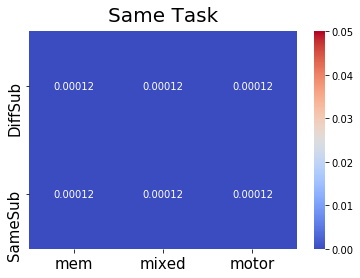

In [7]:
ax=sns.heatmap(ST, annot=True, vmin=0, vmax=.05, cmap="coolwarm")
ax.set_title('Same Task', fontsize=20, pad=10)
plt.ylabel('')
plt.xlabel('')
ax.tick_params(labelsize=15)
plt.savefig(thisDir+'output/mL/images/ridge/figs/general_ST_pvals_plots.png', bbox_inches='tight')

In [10]:
SS_pivot=SS_all.pivot('train_task','test_task','pval')
BS_pivot=BS_all.pivot('train_task','test_task','pval')

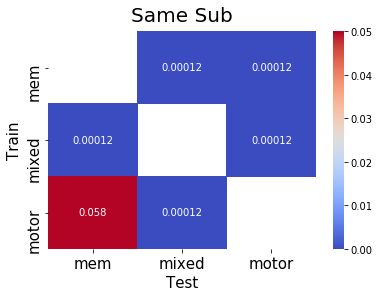

In [16]:
ax=sns.heatmap(SS_pivot, annot=True, vmin=0, vmax=.05, cmap="coolwarm")
ax.set_title('Same Sub', fontsize=20, pad=10)
plt.ylabel('Train',fontsize=15)
plt.xlabel('Test',fontsize=15)
ax.tick_params(labelsize=15)
plt.savefig(thisDir+'output/mL/images/ridge/figs/general_SS_pvals_plots.png', bbox_inches='tight')

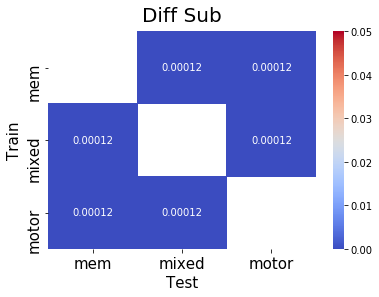

In [17]:
ax=sns.heatmap(BS_pivot, annot=True, vmin=0, vmax=.05, cmap="coolwarm")
ax.set_title('Diff Sub', fontsize=20, pad=10)
plt.ylabel('Train',fontsize=15)
plt.xlabel('Test',fontsize=15)
ax.tick_params(labelsize=15)
plt.savefig(thisDir+'output/mL/images/ridge/figs/general_BS_pvals_plots.png', bbox_inches='tight')